Shape Interpolation

[[0.  0. ]
 [0.  1.1]
 [1.  0. ]
 [1.  1. ]]


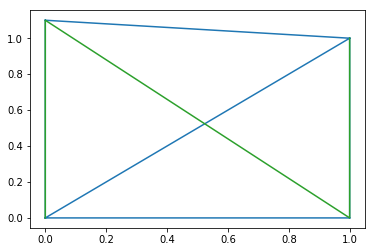

In [156]:
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import numpy as np
import os
import glob
from PIL import Image

points = np.array([[0,0], [0,1.1], [1,0], [1,1]])
print(points)
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1])
plt.show()


In [29]:

x_vector = np.array([]) #33 files and 58 points per file (1914 total entries)
y_vector = np.array([]) #33 files and 58 points per file

i = 0
for filename in os.listdir('/home/pascal/computer_graphics/shape_interpolation_HW2/imm_face_db'):
    if filename.endswith("1m.asf") :  #all male faces (straight faces)
        #  print(filename)
        #  print(get_landmarks(filename))
         x_s, y_s = get_landmarks(filename)
         x_vector = np.append(x_vector, [[x_s]])
         y_vector = np.append(y_vector, [[y_s]])

        #  if i == 0:
        #      print(x_vector)

         i = i+1
         continue
    else:
        continue

print("File num: %d" % i)

print('x pixel of 1st file: %f ' % x_vector[0]) # Manually compute this for check (27-1m.asf)
print('x_pixel of last file: %f' % x_vector[1913]) # (18-1m.asf)
print('Length of y vector: %d ' % y_vector.shape)


[231.99232   237.2501952 246.8896128 263.5395456 281.0657664 307.3551168
 334.5208    360.8101248 377.4600576 393.2336832 407.2546368 417.7703872
 419.523008  396.7389312 391.481056  380.965312  366.068     358.1811904
 367.8206272 377.4600576 387.975808  256.5290432 263.5395456 276.684224
 288.0762688 300.34464   288.9525824 276.684224  267.0447936 351.1706944
 359.057504  398.4915136 405.502016  410.7598848 305.602496  297.7156992
 260.9106048 252.1475008 245.1370048 290.7052032 319.623488  330.1392384
 339.7786688 371.3258752 352.0470016 333.6444864 316.9945536 314.3656128
 316.11824   305.602496  304.7261824 316.9945536 331.0155456 346.7891328
 356.4285632 350.2943808 341.531296  341.531296 ]
File num: 33
x pixel of 1st file: 231.992320 
x_pixel of last file: 321.790317
Length of y vector: 1914 


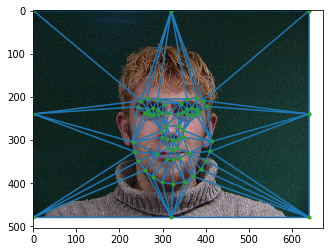

In [157]:
# S_male = npS_maleS_maleS_maleS_male.divide(x_matrix, y_matrix)
N_faces = 33
x_matrix = np.reshape(x_vector, (33, 58)) # now each image is a row in this matrix
y_matrix = np.reshape(y_vector, (33, 58))

#Images for warping animation
# s1_x = x_matrix[0]; 
# print('s1_x : ', s1_x)
s1 = np.zeros((58,2))
s2 = np.zeros((58, 2))
s1[:,0] = x_matrix[0]
s1[:,1] = y_matrix[0]

s2[:,0] = x_matrix[1]
s2[:,1] = y_matrix[1]

# im1 = imageio.imread(
#     '//home/pascal/computer_graphics/shape_interpolation_HW2/warping_0.jpg')
# im2 = imageio.imread(
#     '/home/pascal/computer_graphics/shape_interpolation_HW2/warping_0.1.jpg')
# filenames = [im1, im2]

# filenames = ['/home/pascal/computer_graphics/shape_interpolation_HW2/warping_0.jpg', '/home/pascal/computer_graphics/shape_interpolation_HW2/warping_0.1.jpg' ]

# im1 = '/home/pascal/computer_graphics/shape_interpolation_HW2/warping_0.jpg'
# im2 = '//home/pascal/computer_graphics/shape_interpolation_HW2/warping_0.1.jpg'

gen_warping_seq(s1, s2)

frames = []
imgs = glob.glob("*.jpg")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('warping_anim.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

avg_x_mtrx = np.array(np.sum(x_matrix, axis=0)/N_faces)
avg_y_mtrx = np.array(np.sum(y_matrix, axis=0)/N_faces)

avg_male = np.zeros((58,2))
avg_male[:,0] = avg_x_mtrx
avg_male[:,1] = avg_y_mtrx
# print(avg_male)
# print(avg_male.shape)
avg_male = add_corners_and_edges(avg_male)
delaunay_tri = Delaunay(avg_male)
img = '/home/pascal/computer_graphics/shape_interpolation_HW2/imm_face_db/01-1m.jpg'
plot_delaunay(avg_male, delaunay_tri, img)
# compute_delaunay_tri(avg_male)




In [146]:
def gen_warping_seq(s1, s2):
    def my_range(sta, end, stp):
        while sta <= end:
            yield sta
            sta += stp

    # j = 0
    for a in my_range(0, 1, 0.1):
        sj = (1-a)*s1 + a*s2
        delaunay_tri = Delaunay(sj)  
        plt.triplot(sj[:,0], sj[:,1], delaunay_tri.simplices.copy())
        plt.plot(sj[:,0], sj[:,1],'.')

        plt.gca().invert_yaxis() #Flip the print

        plt.savefig('warping_'+str(a)+'.jpg')
        plt.clf() #clear plt

    # print('Last sj: ', sj.shape)
    # print('Delaunay: ', delaunay_tri.shape)


In [92]:
def plot_delaunay(points, tri, img) :
    img = plt.imread(img)
    imgplot = plt.imshow(img)
    plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
    plt.plot(points[:,0], points[:,1],'.')
    # plt.savefig("avgDelauney.png")
    plt.show()

In [82]:
def add_corners_and_edges(pts):
    points = np.append(pts, [[0,0], [0,480], [640,0],[640,480],[0,480/2], [640, 480/2], [640/2, 0],[640/2, 480]], axis=0)
    # print(points)
    return points

In [3]:
def get_landmarks(filename):
    # female_coords = open("./imm_face_db/14-5f.asf", "r")
    TOTAL_POINTS = 58
    # landmarks = np.zeros((0, 2))
    x_s = np.zeros((0,1))
    y_s = np.zeros((0,1))
    landmark_file = open("./imm_face_db/"+ filename, "r")
    for i in range(80):
        # print("Line number: %d - " % i)
        line = landmark_file.readline()
        # print(line)
        if (i >= 16) & (i <= 16 + (TOTAL_POINTS-1)) : #landmark indices start at on line 16
            line_16 = line
            # print(line_16)
            splitted_line = line_16.split("\t", 4)
            # print(splitted_line)
            x = splitted_line[2]
            y = splitted_line[3]
            # print("x: %f , y: %f " % (float(x), float(y)))
            x_pixel = float(x)*640 #Multiply by image width (Why isn't this returning an integer?)
            y_pixel = float(y)*480 #Multiply by image heighh
            # landmarks = np.append(landmarks, [[x_pixel, y_pixel]], axis=0)
            x_s = np.append(x_s, [[x_pixel]])
            y_s = np.append(y_s, [[y_pixel]])
    # print("x: %f , y: %f " % (x_pixel, y_pixel))
    # return landmarks
    landmark_file.close()
    return x_s, y_s